# Medical Cost

In this notebook, we're going to predict medical cost based on person status. 

We'll try to solve this problem with Regression Model.

Here is a list of the Regression Models we will try :

*   Linear Regression
* Ridge Regression
*   Lasso Regression
* Decision Tree Regression
* Random Forest Regressor
* AdaBoost Regression





In [1]:
import pandas as pd
import numpy as np

#import visualization library
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
#import library for machine learning regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder ,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import mean_squared_error ,mean_absolute_error ,r2_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance


This dataset was taken from the book Machine Learning with R by Brett Lantz .Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

The data contains the following fields:

* **age**: age of primary beneficiary

* **sex**: insurance contractor gender, female, male
* **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* **children**: Number of children covered by health insurance / Number of dependents

* **smoker**: Smoking

* **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* **charges**: Individual medical costs billed by health insurance



In [4]:
data = pd.read_csv("/content/drive/MyDrive/dataset/portofolio/medical_cost/Medical_Cost.csv")

In [5]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Our dataset is complete and clean.**

In [8]:
#lets check unique value on categorical columns
print(data['region'].unique())
print(data['smoker'].unique())
print(data['sex'].unique())

['southwest' 'southeast' 'northwest' 'northeast']
['yes' 'no']
['female' 'male']


In [9]:
# convert categorical column to number with label encoder from sklearn.
label_encoders = {}
categorical_columns = ['region', 'sex', 'smoker']  

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column]) 

In [10]:
data.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061


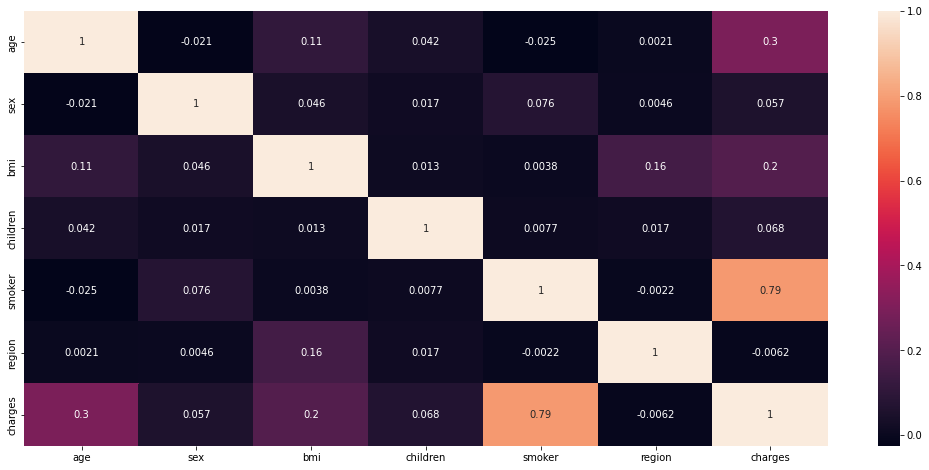

In [11]:
#lets check our data correlation
plt.figure(figsize=(18,8))
ax=sns.heatmap(data.corr(),annot=True)


as we can see , **charges was mainly influenced by smoker**. charges also influenced by age and bmi ,even though the correlation number is small.

In [53]:
data_before= pd.read_csv("/content/drive/MyDrive/dataset/portofolio/medical_cost/Medical_Cost.csv")

In [56]:
fig= px.scatter(data_before,x='smoker',y='charges',color='sex',color_continuous_scale='Bluered_r')
fig.update_layout(plot_bgcolor='white',
                  title={'text':'Smoker vs Charges','x':0.5, 'xanchor':'center','yanchor':'top'})
fig.update_xaxes(title='Price range')
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

Earlier we got 0.79 correlation between smoker and charges. Smokers are charged more than non-smokers.

In [54]:
fig= px.scatter(data_before,x='age',y='charges',color='sex',color_continuous_scale='Bluered_r')
fig.update_layout(plot_bgcolor='white',
                  title={'text':'Age vs Charges','x':0.5, 'xanchor':'center','yanchor':'top'})
fig.update_xaxes(title='Price range')
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

Previously we got a 0.3 correlation between age and cost, as we saw our plot above, there is a clear indication that if age is higher then price is higher.

In [58]:
fig= px.scatter(data_before,x='bmi',y='charges',color='sex',color_continuous_scale='Bluered_r')
fig.update_layout(plot_bgcolor='white',
                  title={'text':'BMI vs Charges','x':0.5, 'xanchor':'center','yanchor':'top'})
fig.update_xaxes(title='Price range')
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

Earlier we got 0.3 correlation between bmi and charges. with chart above we can see that there is a small price increase when bmi is increases.

In [14]:
#using standard scaler to scale our data.
scaler = StandardScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])

In [15]:
data

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905,0.298584
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495,-0.953689
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495,-0.728675
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915,0.719843
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915,-0.776802
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915,-0.220551
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326,-0.914002
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495,-0.961596
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905,-0.930362


# Splitting Data into training and testing

In [16]:
X= data.iloc[:,:6]
y= data['charges']

In [17]:
# split training and test data , we will set the test_size 0.25
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=64)

# Create Machine Learning Model

### Create function to evaluate model performance

In [18]:
#creating model performance metrics.
def model_performance(model,model_name,x_train = x_train,y_train = y_train,x_test = x_test,y_test = y_test):
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    Training_Score = np.round(model.score(x_train,y_train),3)
    Testing_Score = np.round(model.score(x_test,y_test),3)
    
    mse_training = np.round(mean_squared_error(y_train,y_train_pred),3)
    mse_testing = np.round(mean_squared_error(y_test,y_test_pred),3)
    
    mae_training = np.round(mean_absolute_error(y_train,y_train_pred),3)
    mae_testing = np.round(mean_absolute_error(y_test,y_test_pred),3)
    
    r2_training = np.round(r2_score(y_train,y_train_pred),3)
    r2_testing = np.round(r2_score(y_test,y_test_pred),3)
    
    
    print("Model Performance for:",model_name)
    print("")
    
    print("Training Score:",Training_Score)
    print("Testing Score:",Testing_Score)
    print("")
    
    print("Training Data Mean Squared Error:",mse_training)
    print("Testing Data Mean Squared Error:",mse_testing)
    print("")
    
    print("Training Data Mean Absolute Error:",mae_training)
    print("Testing Data Mean Absolute Error:",mae_testing)
    print("")
    
    print("Training Data r2_score:",r2_training)
    print("Testing Data r2_score:",r2_testing)
    print("")

    #plot our data
    print("Residual anaylisis :")
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=y_train,y=(y_train-y_train_pred),mode='markers',name='y train'))
    fig.add_trace(go.Scatter(x=y_test,y=(y_test-y_test_pred),mode='markers',name='y test'))
    fig.show()
    
    return Training_Score,Testing_Score ,mse_training,mse_testing,mae_training,mae_testing,r2_training,r2_testing

## Linear Regression Model

In [19]:
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [20]:
Linear_regression_performance = model_performance(model1,model_name=model1)

Model Performance for: LinearRegression()

Training Score: 0.749
Testing Score: 0.755

Training Data Mean Squared Error: 0.253
Testing Data Mean Squared Error: 0.241

Training Data Mean Absolute Error: 0.353
Testing Data Mean Absolute Error: 0.348

Training Data r2_score: 0.749
Testing Data r2_score: 0.755

Residual anaylisis :


## Ridge Model

In [21]:
param_grid = {'alpha':np.random.rand(100)}
grid = GridSearchCV(Ridge(),param_grid=param_grid,cv=4)
grid.fit(X,y)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': array([0.09536053, 0.32644238, 0.03142951, 0.76843464, 0.32447037,
       0.13634851, 0.44004307, 0.05370318, 0.49938006, 0.21379911,
       0.47941206, 0.46137605, 0.11792925, 0.84335108, 0.37695478,
       0.02631028, 0.40226377, 0.3687001 , 0.16502109, 0.04936644,
       0.19722307, 0.37072794, 0.69358223, 0.24450212, 0.15800831,
       0.39632578, 0....
       0.56627913, 0.07808351, 0.42086432, 0.69487915, 0.30619687,
       0.99774086, 0.0431537 , 0.85698542, 0.36107317, 0.99961897,
       0.51305984, 0.5605049 , 0.54069476, 0.38198779, 0.76389783,
       0.46509878, 0.67211906, 0.68248177, 0.90043875, 0.3362173 ,
       0.13331045, 0.07055882, 0.35152044, 0.08529416, 0.67958827,
       0.97761354, 0.05477231, 0.31390528, 0.63384107, 0.20108394,
       0.88894911, 0.4816903 , 0.56403573, 0.34684915, 0.63501067])})

In [22]:
model2 = grid.best_estimator_
model2.fit(x_train,y_train)

Ridge(alpha=0.6350106656170516)

In [23]:
Ridge_performance = model_performance(model2,model_name=model2)

Model Performance for: Ridge(alpha=0.6350106656170516)

Training Score: 0.749
Testing Score: 0.755

Training Data Mean Squared Error: 0.253
Testing Data Mean Squared Error: 0.241

Training Data Mean Absolute Error: 0.353
Testing Data Mean Absolute Error: 0.348

Training Data r2_score: 0.749
Testing Data r2_score: 0.755

Residual anaylisis :


## Lasso Model

In [24]:
param_grid = {'alpha':np.random.rand(100)}
lasso = GridSearchCV(Lasso(),param_grid=param_grid,cv=4)
lasso.fit(X,y)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': array([0.66787928, 0.30312724, 0.61723143, 0.5929757 , 0.72426409,
       0.91956545, 0.00547132, 0.01848556, 0.1530072 , 0.27870934,
       0.19389165, 0.52629155, 0.24217131, 0.99678166, 0.10117309,
       0.78927883, 0.08625229, 0.63238899, 0.48092787, 0.53307023,
       0.2663484 , 0.04817369, 0.75577502, 0.67827635, 0.41228372,
       0.85768229, 0.65...
       0.3378052 , 0.68606159, 0.25827432, 0.37355575, 0.08713352,
       0.89878587, 0.057243  , 0.00156481, 0.9494761 , 0.69240585,
       0.39018328, 0.49322976, 0.92076366, 0.65880588, 0.12122864,
       0.16825246, 0.68724504, 0.92504447, 0.31744346, 0.69434248,
       0.79293661, 0.82960341, 0.74610034, 0.97890079, 0.77222326,
       0.66062085, 0.24076884, 0.23893088, 0.5253484 , 0.83303493,
       0.32425041, 0.20780107, 0.3574396 , 0.23105611, 0.54784102])})

In [25]:
model3 = lasso.best_estimator_
model3.fit(x_train,y_train)

Lasso(alpha=0.0015648087437056812)

In [26]:
Lasso_performance = model_performance(model3,model_name=model3)

Model Performance for: Lasso(alpha=0.0015648087437056812)

Training Score: 0.749
Testing Score: 0.755

Training Data Mean Squared Error: 0.253
Testing Data Mean Squared Error: 0.241

Training Data Mean Absolute Error: 0.352
Testing Data Mean Absolute Error: 0.348

Training Data r2_score: 0.749
Testing Data r2_score: 0.755

Residual anaylisis :


## Decision Tree Regressor

In [27]:
param_grid = {'max_depth':np.arange(1,10),'min_samples_split':np.arange(2,10),'min_samples_leaf':np.arange(1,10)}
DTR = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid,cv=4)
DTR.fit(X,y)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [28]:
model4 = DTR.best_estimator_
model4.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=8)

In [29]:
Decision_Tree_Regressor_Performance = model_performance(model4,model_name=model4)

Model Performance for: DecisionTreeRegressor(max_depth=5, min_samples_leaf=8)

Training Score: 0.875
Testing Score: 0.88

Training Data Mean Squared Error: 0.126
Testing Data Mean Squared Error: 0.118

Training Data Mean Absolute Error: 0.2
Testing Data Mean Absolute Error: 0.193

Training Data r2_score: 0.875
Testing Data r2_score: 0.88

Residual anaylisis :


## Random Forest Regression Model

In [30]:
model5 = RandomForestRegressor(max_depth=4,min_samples_split=2, min_samples_leaf=2)
model5.fit(X,y)

RandomForestRegressor(max_depth=4, min_samples_leaf=2)

In [31]:
Random_Forest_Performance =  model_performance(model5,model_name=model5)

Model Performance for: RandomForestRegressor(max_depth=4, min_samples_leaf=2)

Training Score: 0.867
Testing Score: 0.899

Training Data Mean Squared Error: 0.134
Testing Data Mean Squared Error: 0.099

Training Data Mean Absolute Error: 0.205
Testing Data Mean Absolute Error: 0.18

Training Data r2_score: 0.867
Testing Data r2_score: 0.899

Residual anaylisis :


## AdaBoost Regressor Model

In [32]:
model6= AdaBoostRegressor(DecisionTreeRegressor(max_depth=5,min_samples_leaf=8))
model6.fit(X,y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5,
                                                       min_samples_leaf=8))

In [33]:
AdaBoost_Regressor_Performance =  model_performance(model6,model_name=model6)

Model Performance for: AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5,
                                                       min_samples_leaf=8))

Training Score: 0.702
Testing Score: 0.708

Training Data Mean Squared Error: 0.3
Testing Data Mean Squared Error: 0.287

Training Data Mean Absolute Error: 0.517
Testing Data Mean Absolute Error: 0.506

Training Data r2_score: 0.702
Testing Data r2_score: 0.708

Residual anaylisis :


In [34]:
#convert our result to a series. later on we will convert this to dataframe.
model_performance = [
                     ['Linear Regression',Linear_regression_performance[0],Linear_regression_performance[1],Linear_regression_performance[2],
                      Linear_regression_performance[3],Linear_regression_performance[4],Linear_regression_performance[5],Linear_regression_performance[6],
                      Linear_regression_performance[7]],
                     
                     ['Ridge Regression',Ridge_performance[0],Ridge_performance[1],Ridge_performance[2],Ridge_performance[3],
                      Ridge_performance[4],Ridge_performance[5],Ridge_performance[6],Ridge_performance[7]],
                     
                     ['Lasso Regression',Lasso_performance[0],Lasso_performance[1],Lasso_performance[2],Lasso_performance[3],Lasso_performance[4],
                      Lasso_performance[5],Lasso_performance[6],Lasso_performance[7]],
                     
                     ['Decision Tree Regressor',Decision_Tree_Regressor_Performance[0],Decision_Tree_Regressor_Performance[1],Decision_Tree_Regressor_Performance[2],
                      Decision_Tree_Regressor_Performance[3],Decision_Tree_Regressor_Performance[4],Decision_Tree_Regressor_Performance[5],
                      Decision_Tree_Regressor_Performance[6],Decision_Tree_Regressor_Performance[7]],
                     
                     ['Random Forest',Random_Forest_Performance[0],Random_Forest_Performance[1],Random_Forest_Performance[2],Random_Forest_Performance[3],
                      Random_Forest_Performance[4],Random_Forest_Performance[5],Random_Forest_Performance[6],Random_Forest_Performance[7]],
                     
                     ['AdaBoost',AdaBoost_Regressor_Performance[0],AdaBoost_Regressor_Performance[1],AdaBoost_Regressor_Performance[2],
                      AdaBoost_Regressor_Performance[3],AdaBoost_Regressor_Performance[4],AdaBoost_Regressor_Performance[5],
                      AdaBoost_Regressor_Performance[6],AdaBoost_Regressor_Performance[7]]
                  ]

In [36]:
#converting series of model performance result to dataframe & setting column name
performance = pd.DataFrame(model_performance,columns = ['Model_Name',"Train Score","Test Score","Train MSE",'Test MSE','Train MAE',"Test MAE","Train R2","Test R2"])

In [60]:
#show performance result ,sort by highest R2 .
performance.sort_values(by='Test R2',ascending=False).reset_index(drop=True)

,Model_Name,Train Score,Test Score,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2
0,Random Forest,0.867,0.899,0.134,0.099,0.205,0.180,0.867,0.899
1,Decision Tree Regressor,0.875,0.880,0.126,0.118,0.200,0.193,0.875,0.880
2,Linear Regression,0.749,0.755,0.253,0.241,0.353,0.348,0.749,0.755
3,Ridge Regression,0.749,0.755,0.253,0.241,0.353,0.348,0.749,0.755
4,Lasso Regression,0.749,0.755,0.253,0.241,0.352,0.348,0.749,0.755
5,AdaBoost,0.702,0.708,0.300,0.287,0.517,0.506,0.702,0.708


# Summary

We found that on our dataset , it is best to use Random Forest or Decision Tree Regressor . both have simillar result.

**Random forest** got 0.867 for **R2 train** and 0.899 for **R2 test**

**Decision Tree Regressor** got 0.875 for **R2 train** and 0.880 for **R2 test**